In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [2]:
df_mat_alcohol = pd.read_csv('student-mat.csv')

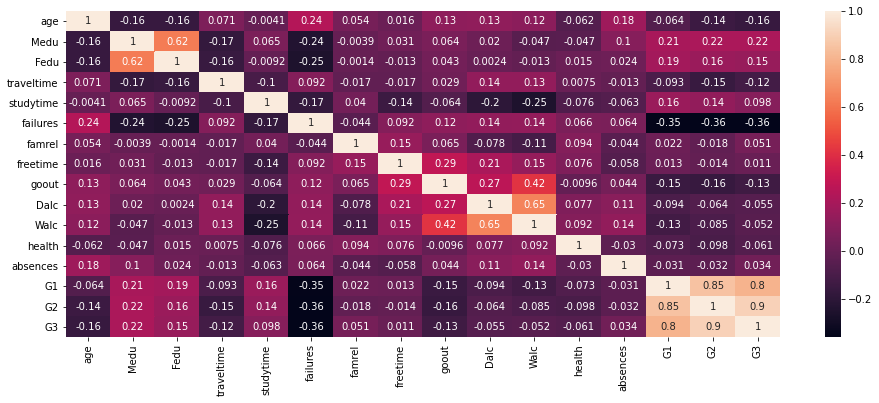

In [3]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_mat_alcohol.corr(),annot=True);

In [4]:
def label_edu(row):
    if row >= 3:
        return 'yes'
    else: return 'no'


In [5]:
# df_mat_alcohol['Medu'] = df_mat_alcohol['Medu'].apply(lambda row: label_edu(row))
# df_mat_alcohol['Fedu'] = df_mat_alcohol['Fedu'].apply(lambda row: label_edu(row))

# df_mat_alcohol['failures'] = df_mat_alcohol['failures'].apply(lambda row: label_edu(row))

In [6]:
df_mat_alcohol.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df_mat_alcohol.schoolsup = df_mat_alcohol.schoolsup.eq('yes').mul(1)
df_mat_alcohol.famsup = df_mat_alcohol.famsup.eq('yes').mul(1)
df_mat_alcohol.paid = df_mat_alcohol.paid.eq('yes').mul(1)
df_mat_alcohol.activities = df_mat_alcohol.activities.eq('yes').mul(1)
df_mat_alcohol.nursery = df_mat_alcohol.nursery.eq('yes').mul(1)
df_mat_alcohol.higher = df_mat_alcohol.higher.eq('yes').mul(1)
df_mat_alcohol.internet = df_mat_alcohol.internet.eq('yes').mul(1)
df_mat_alcohol.romantic = df_mat_alcohol.romantic.eq('yes').mul(1)

#df_mat_alcohol.Medu = df_mat_alcohol.Medu.eq('yes').mul(1)
#df_mat_alcohol.Fedu = df_mat_alcohol.Fedu.eq('yes').mul(1)

#df_mat_alcohol.failures = df_mat_alcohol.failures.eq('yes').mul(1)

In [8]:
one_hot = pd.get_dummies(df_mat_alcohol['school'])
df_mat_alcohol = df_mat_alcohol.drop('school',axis = 1)
df_mat_alcohol = df_mat_alcohol.join(one_hot)


one_hot = pd.get_dummies(df_mat_alcohol['sex'])
df_mat_alcohol = df_mat_alcohol.drop('sex',axis = 1)
df_mat_alcohol = df_mat_alcohol.join(one_hot)

one_hot = pd.get_dummies(df_mat_alcohol['address'])
df_mat_alcohol = df_mat_alcohol.drop('address',axis = 1)
df_mat_alcohol = df_mat_alcohol.join(one_hot)

one_hot = pd.get_dummies(df_mat_alcohol['famsize'])
df_mat_alcohol = df_mat_alcohol.drop('famsize',axis = 1)
df_mat_alcohol = df_mat_alcohol.join(one_hot)


one_hot = pd.get_dummies(df_mat_alcohol['Pstatus'])
df_mat_alcohol = df_mat_alcohol.drop('Pstatus',axis = 1)
df_mat_alcohol = df_mat_alcohol.join(one_hot)

one_hot = pd.get_dummies(df_mat_alcohol['guardian'])
df_mat_alcohol = df_mat_alcohol.drop('guardian',axis = 1)
df_mat_alcohol = df_mat_alcohol.join(one_hot)




In [9]:
df_mat_alcohol = df_mat_alcohol.drop(columns=['Mjob', 'Fjob', 'G1', 'G2', 'reason'])

In [10]:
df_mat_alcohol

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,M,R,U,GT3,LE3,A,T,father,mother,other
0,18,4,4,2,2,0,1,0,0,0,...,0,0,1,1,0,1,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,...,0,0,1,1,0,0,1,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,0,0,1,0,1,0,1,0,1,0
3,15,4,2,1,3,0,0,1,1,1,...,0,0,1,1,0,0,1,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,0,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,0,1,1,0,...,1,0,1,0,1,1,0,0,0,1
391,17,3,1,2,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
392,21,1,1,1,1,3,0,0,0,0,...,1,1,0,1,0,0,1,0,0,1
393,18,3,2,3,1,0,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0


In [11]:
import pandas as pd
from sklearn import preprocessing

cols = df_mat_alcohol.columns
x = df_mat_alcohol.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_mat_alcohol = pd.DataFrame(x_scaled, columns =cols )

In [12]:
df_mat_alcohol

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,M,R,U,GT3,LE3,A,T,father,mother,other
0,0.428571,1.00,1.00,0.333333,0.333333,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.285714,0.25,0.25,0.000000,0.333333,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.000000,0.25,0.25,0.000000,0.333333,1.000000,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.000000,1.00,0.50,0.000000,0.666667,0.000000,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.142857,0.75,0.75,0.000000,0.333333,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.714286,0.50,0.50,0.000000,0.333333,0.666667,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
391,0.285714,0.75,0.25,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
392,0.857143,0.25,0.25,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
393,0.428571,0.75,0.50,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [13]:
def get_MAE(theta, X, y):
    mae = sum(abs(y - X@theta))/len(y)
    return mae

In [14]:
df_train = df_mat_alcohol.loc[:, df_mat_alcohol.columns != 'G3']
X, X_test, Y, Y_test = train_test_split(df_train, 
                                        np.expand_dims(df_mat_alcohol['G3'],1),
                                        test_size=0.5, 
                                        random_state=0)

#adding a bias term
X = np.hstack([np.ones([X.shape[0],1]), X])
X_test = np.hstack([np.ones([X_test.shape[0],1]), X_test])

In [15]:
X

array([[1.        , 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.42857143, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.28571429, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.14285714, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.14285714, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.28571429, 1.        , ..., 0.        , 1.        ,
        0.        ]])

## Question 2.2
Implement below the mean-absolute error regression with LASSO. Use $\lambda=0.5$. Hints: in the X matrix, rows represent data samples. Also, don't forget to add the `1` column to capture the intercept. (Use the `GLPK` solver)

In [36]:
samples_count = X.shape[0]
lam =0.005

theta = cp.Variable((X.shape[1],1))

constraints = []


obj = cp.Minimize(cp.sum(cp.abs(Y - X@theta)) / samples_count + lam*cp.norm(theta, 1))
prob = cp.Problem(obj, constraints)

prob.solve(solver=cp.GLPK)

0.1414353614872625

In [37]:
theta_final = theta.value

In [38]:
columns_train = df_train.columns.tolist()
columns_train.insert(0, 'Intercept')

In [39]:
for i in range(len(theta_final)):
    if(theta_final[i] != 0):
        print('{}: {}'.format(columns_train[i], theta_final[i]))

Intercept: [0.30560633]
age: [-0.1528488]
Medu: [0.04243301]
Fedu: [0.14021768]
traveltime: [-9.20018638e-16]
studytime: [0.18253012]
failures: [-0.07992659]
schoolsup: [-0.09407983]
famsup: [-0.05332888]
paid: [-0.00158299]
activities: [0.00610168]
nursery: [0.00666116]
higher: [0.10804908]
internet: [-0.02445246]
romantic: [-0.03020935]
famrel: [0.00954395]
freetime: [0.10643962]
goout: [-0.062746]
Dalc: [0.01998441]
Walc: [0.01499576]
health: [-0.04253535]
absences: [-0.03471211]
GP: [3.86843335e-16]
MS: [0.00291252]
M: [0.01503903]
U: [0.0786179]
LE3: [0.00373163]
T: [0.00147927]
father: [0.00659372]
mother: [-5.49837953e-16]


In [20]:
from sklearn.metrics import mean_absolute_error as mae

In [21]:
print(color.BOLD + 'Training Results' + color.END)
print('MAE: {}'.format(mae(X @ theta_final, Y)))
print('\n')
print(color.BOLD + 'Test Results' + color.END)
print('MAE: {}'.format(mae(X_test @ theta_final, Y_test)))

Training Results
MAE: 0.1356927952322066


Test Results
MAE: 0.17466170588839847
